In [1]:
import math
import tensorflow as tf
import numpy as np
import pylab as plt
import pandas as pd

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
# Set compatibility mode
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Set pandas display option
pd.options.display.float_format = "{:,.4f}".format 

# RTX ON
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
# scale data
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

In [4]:
NUM_FEATURES = 21
NUM_CLASSES = 3

hidden_units = 25
learning_rate = 0.01
beta = [0, 10**-3, 10**-6, 10**-9, 10**-12]
batch_size = 16
no_folds = 5

epochs = 2001
seed = 10
np.random.seed(seed)

In [5]:
#read data
data_input = np.genfromtxt('ctg_data_cleaned.csv', delimiter= ',')
data_X, data_Y = data_input[1:, :21], data_input[1:,-1].astype(int)
dataX = scale(data_X, np.min(data_X, axis=0), np.max(data_X, axis=0)) #Scaled X

#Defining the size of training set and data set
dataset_size = len(dataX)
train_size = int(0.7 * dataset_size)
test_size = dataset_size - train_size

#Shuffle the data before splitting to train test set
#Data belongings to the same class are usually cluster together in the dataset, we want to shuffle them
idx = np.arange(dataset_size)
np.random.shuffle(idx)
dataX = dataX[idx]
data_Y = data_Y[idx]
dataY = np.zeros((data_Y.shape[0], NUM_CLASSES))
dataY[np.arange(data_Y.shape[0]), data_Y-1] = 1 #one hot matrix

#Split the training and testing set
trainX = dataX[:train_size]
trainY = dataY[:train_size]

testX = dataX[train_size:]
testY = dataY[train_size:]

In [6]:
# Create the model
x = tf.placeholder(tf.float32, [None, NUM_FEATURES])
y_ = tf.placeholder(tf.float32, [None, NUM_CLASSES])

#Build the graph for the neural network

def ffn(x, hidden_units):
    global w1,b1,h1,w2,b2
    w1 = tf.Variable(tf.truncated_normal([NUM_FEATURES, hidden_units], stddev=1.0/math.sqrt(float(NUM_FEATURES))), name='weights')
    b1 = tf.Variable(tf.zeros([hidden_units]),name='biases')
    h1 = tf.nn.relu(tf.matmul(x, w1) + b1) #Hidden layer with relu activation

    w2 = tf.Variable(tf.truncated_normal([hidden_units, NUM_CLASSES], stddev=1.0/math.sqrt(float(hidden_units))), name='weights')
    b2 = tf.Variable(tf.zeros([NUM_CLASSES]),name='biases')
    u = tf.matmul(h1, w2) + b2  #logits=u
    return u

decay parameter 0 fold 1 iter 1: Validation accuracy 0.7946127653121948
decay parameter 0 fold 1 iter 1000: Validation accuracy 0.8855218887329102
decay parameter 0 fold 1 iter 2000: Validation accuracy 0.9057239294052124

decay parameter 0 fold 2 iter 1: Validation accuracy 0.7575757503509521
decay parameter 0 fold 2 iter 1000: Validation accuracy 0.9090909361839294
decay parameter 0 fold 2 iter 2000: Validation accuracy 0.9292929172515869

decay parameter 0 fold 3 iter 1: Validation accuracy 0.7979797720909119
decay parameter 0 fold 3 iter 1000: Validation accuracy 0.9158248901367188
decay parameter 0 fold 3 iter 2000: Validation accuracy 0.939393937587738

decay parameter 0 fold 4 iter 1: Validation accuracy 0.744107723236084
decay parameter 0 fold 4 iter 1000: Validation accuracy 0.8585858345031738
decay parameter 0 fold 4 iter 2000: Validation accuracy 0.868686854839325

decay parameter 0 fold 5 iter 1: Validation accuracy 0.7845118045806885
decay parameter 0 fold 5 iter 1000: Val

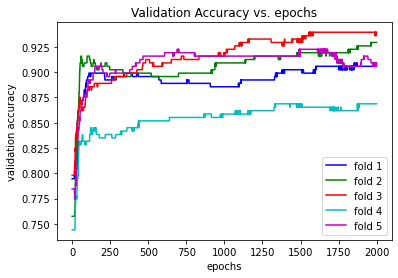

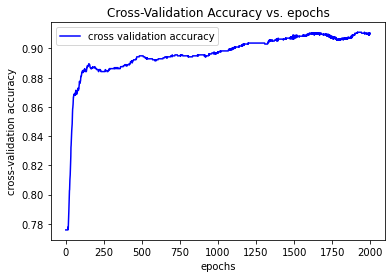

For decay parameter 0,Ending validation accuracy for each fold: [0.9057239, 0.9292929, 0.93939394, 0.86868685, 0.90909094]
Cross Validation Accuracy 0.9104377031326294

decay parameter 0.001 fold 1 iter 1: Validation accuracy 0.7946127653121948
decay parameter 0.001 fold 1 iter 1000: Validation accuracy 0.8922559022903442
decay parameter 0.001 fold 1 iter 2000: Validation accuracy 0.8922559022903442

decay parameter 0.001 fold 2 iter 1: Validation accuracy 0.7575757503509521
decay parameter 0.001 fold 2 iter 1000: Validation accuracy 0.9090909361839294
decay parameter 0.001 fold 2 iter 2000: Validation accuracy 0.9124578833580017

decay parameter 0.001 fold 3 iter 1: Validation accuracy 0.7979797720909119
decay parameter 0.001 fold 3 iter 1000: Validation accuracy 0.9225589036941528
decay parameter 0.001 fold 3 iter 2000: Validation accuracy 0.9292929172515869

decay parameter 0.001 fold 4 iter 1: Validation accuracy 0.744107723236084
decay parameter 0.001 fold 4 iter 1000: Validation 

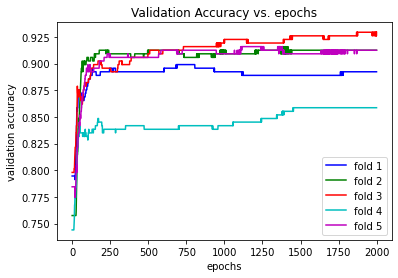

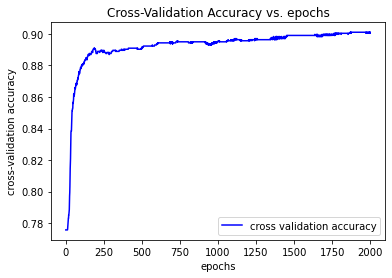

For decay parameter 0.001,Ending validation accuracy for each fold: [0.8922559, 0.9124579, 0.9292929, 0.85858583, 0.9124579]
Cross Validation Accuracy 0.9010100364685059

decay parameter 1e-06 fold 1 iter 1: Validation accuracy 0.7946127653121948
decay parameter 1e-06 fold 1 iter 1000: Validation accuracy 0.8956229090690613
decay parameter 1e-06 fold 1 iter 2000: Validation accuracy 0.9023569226264954

decay parameter 1e-06 fold 2 iter 1: Validation accuracy 0.7575757503509521
decay parameter 1e-06 fold 2 iter 1000: Validation accuracy 0.9023569226264954
decay parameter 1e-06 fold 2 iter 2000: Validation accuracy 0.9124578833580017

decay parameter 1e-06 fold 3 iter 1: Validation accuracy 0.7979797720909119
decay parameter 1e-06 fold 3 iter 1000: Validation accuracy 0.9292929172515869
decay parameter 1e-06 fold 3 iter 2000: Validation accuracy 0.9292929172515869

decay parameter 1e-06 fold 4 iter 1: Validation accuracy 0.744107723236084
decay parameter 1e-06 fold 4 iter 1000: Validatio

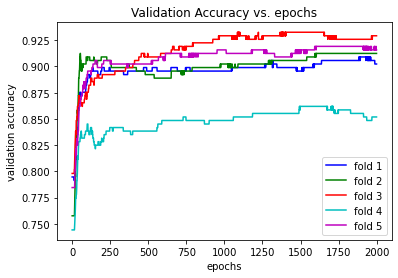

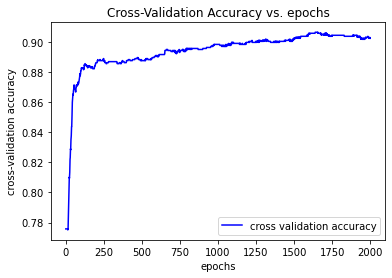

For decay parameter 1e-06,Ending validation accuracy for each fold: [0.9023569, 0.9124579, 0.9292929, 0.8518519, 0.9158249]
Cross Validation Accuracy 0.9023569226264954

decay parameter 1e-09 fold 1 iter 1: Validation accuracy 0.7946127653121948
decay parameter 1e-09 fold 1 iter 1000: Validation accuracy 0.8956229090690613
decay parameter 1e-09 fold 1 iter 2000: Validation accuracy 0.8956229090690613

decay parameter 1e-09 fold 2 iter 1: Validation accuracy 0.7575757503509521
decay parameter 1e-09 fold 2 iter 1000: Validation accuracy 0.8989899158477783
decay parameter 1e-09 fold 2 iter 2000: Validation accuracy 0.9057239294052124

decay parameter 1e-09 fold 3 iter 1: Validation accuracy 0.7979797720909119
decay parameter 1e-09 fold 3 iter 1000: Validation accuracy 0.9191918969154358
decay parameter 1e-09 fold 3 iter 2000: Validation accuracy 0.9292929172515869

decay parameter 1e-09 fold 4 iter 1: Validation accuracy 0.744107723236084
decay parameter 1e-09 fold 4 iter 1000: Validation

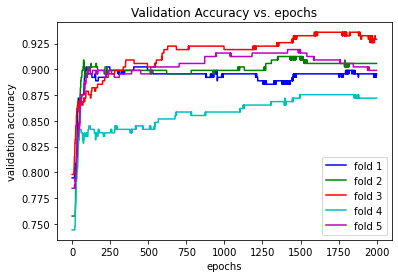

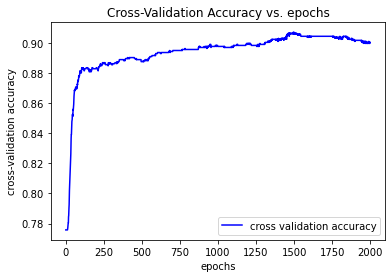

For decay parameter 1e-09,Ending validation accuracy for each fold: [0.8956229, 0.9057239, 0.9292929, 0.87205386, 0.8989899]
Cross Validation Accuracy 0.9003366231918335

decay parameter 1e-12 fold 1 iter 1: Validation accuracy 0.7946127653121948
decay parameter 1e-12 fold 1 iter 1000: Validation accuracy 0.8922559022903442
decay parameter 1e-12 fold 1 iter 2000: Validation accuracy 0.9057239294052124

decay parameter 1e-12 fold 2 iter 1: Validation accuracy 0.7575757503509521
decay parameter 1e-12 fold 2 iter 1000: Validation accuracy 0.9023569226264954
decay parameter 1e-12 fold 2 iter 2000: Validation accuracy 0.9124578833580017

decay parameter 1e-12 fold 3 iter 1: Validation accuracy 0.7979797720909119
decay parameter 1e-12 fold 3 iter 1000: Validation accuracy 0.9124578833580017
decay parameter 1e-12 fold 3 iter 2000: Validation accuracy 0.9191918969154358

decay parameter 1e-12 fold 4 iter 1: Validation accuracy 0.744107723236084
decay parameter 1e-12 fold 4 iter 1000: Validatio

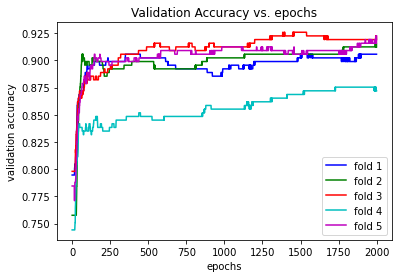

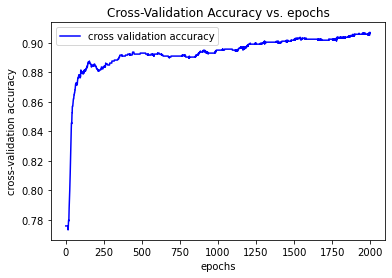

For decay parameter 1e-12,Ending validation accuracy for each fold: [0.9057239, 0.9124579, 0.9191919, 0.87205386, 0.9225589]
Cross Validation Accuracy 0.9063972234725952

Cross Validation accuracy for each decay parameter: [0.9104377, 0.90101004, 0.9023569, 0.9003366, 0.9063972]


In [7]:
N = train_size #70% of the dataset
Nf = N//no_folds

cross_validation_acc =[]
x_validation_acc = np.zeros((no_folds, epochs))

for decay in beta:
  
    u = ffn(x,25)

    #Cross-entropy
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=u)

    #Regularization
    regularization = tf.nn.l2_loss(w1) + tf.nn.l2_loss(w2)

    #Regularized loss
    loss = tf.reduce_mean(cross_entropy + decay*regularization)

    #Defining the optimiser
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)

    # Create a variable to track the global step
    global_step = tf.Variable(0, name='global_step', trainable=False)

    # Use the optimizer to apply the gradients that minimize the loss
    # (and also increment the global step counter) as a single training step.
    train_op = optimizer.minimize(loss, global_step=global_step)

    #Evaluate the accuracy and error
    correct_prediction = tf.cast(tf.equal(tf.argmax(u, 1), tf.argmax(y_, 1)), tf.float32)
    accuracy = tf.reduce_mean(correct_prediction)
    error = tf.reduce_sum(tf.cast(tf.not_equal(tf.argmax(u, axis=1), tf.argmax(y_, axis=1)), dtype=tf.int32))

    validation_acc = np.zeros(no_folds*epochs).reshape(no_folds, epochs)
    ending_validation_acc = []


    #Running the session
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for i in range(epochs):

            for start, end in zip(range(0, N, batch_size), range(batch_size, N, batch_size)): #Want to use all trainX dataset
                train_op.run(feed_dict={x: trainX_train[start:end], y_: trainY_train[start:end]})

            #Calculate validation acc and record it for graph plotting with against epochs
            validation_acc[fold][i]= accuracy.eval(feed_dict={x: trainX_validate, y_: trainY_validate})
            if i == 0 or (i+1)%1000 == 0:
                print('decay parameter {} fold {} iter {}: Validation accuracy {}'.format(decay, fold+1 ,i+1, validation_acc[fold][i]))

        print()

        #Final validation accuracy at end of epochs
        ending_validation_acc.append(accuracy.eval(feed_dict={x: trainX_validate, y_: trainY_validate}))

    # plot learning curves

    plt.figure()
    plt.title('Validation Accuracy vs. epochs')
    plt.xlabel('epochs')
    plt.ylabel('validation accuracy')
    plt.plot(range(epochs), validation_acc[0],'b',label='fold 1')
    plt.plot(range(epochs), validation_acc[1],'g',label='fold 2')
    plt.plot(range(epochs), validation_acc[2],'r',label='fold 3')
    plt.plot(range(epochs), validation_acc[3],'c',label='fold 4')
    plt.plot(range(epochs), validation_acc[4],'m',label='fold 5')
    plt.legend(loc='best')
    plt.show()  

    plt.figure()
    plt.title('Cross-Validation Accuracy vs. epochs')
    plt.xlabel('epochs')
    plt.ylabel('cross-validation accuracy')
    plt.plot(range(epochs), np.mean(validation_acc, axis=0) ,'b',label='cross validation accuracy')
    plt.legend(loc='best')
    plt.show()

    if decay == 0:
    x_validation_acc[0] = np.mean(validation_acc, axis=0)
    elif decay == 10**-3:
    x_validation_acc[1] = np.mean(validation_acc, axis=0)
    elif decay == 10**-6:
    x_validation_acc[2] = np.mean(validation_acc, axis=0)
    elif decay == 10** -9:
    x_validation_acc[3] = np.mean(validation_acc, axis=0)
    elif decay == 10**-12:
    x_validation_acc[4] = np.mean(validation_acc, axis=0)

    print("For decay parameter {}, Ending validation accuracy for each fold: {}".format(decay, ending_validation_acc))
    cv_acc = np.mean(np.array(ending_validation_acc),axis = 0)
    print("Cross Validation Accuracy {}".format(cv_acc))
    print()
    cross_validation_acc.append(cv_acc)

print("Cross Validation accuracy for each decay parameter: {}".format(cross_validation_acc))

In [8]:
print("Decay Parameters:",beta)
print("Cross Validation Accuracy:",cross_validation_acc)

Decay Parameters: [0, 0.001, 1e-06, 1e-09, 1e-12]
Cross Validation Accuracy: [0.9104377, 0.90101004, 0.9023569, 0.9003366, 0.9063972]


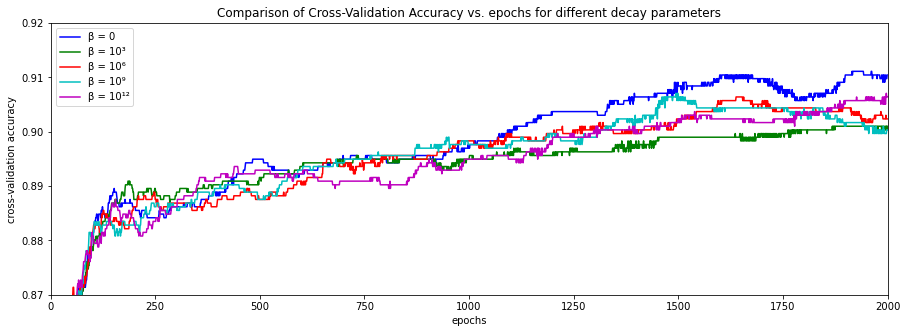

In [13]:
plt.figure(figsize=(15,5))
plt.title('Comparison of Cross-Validation Accuracy vs. epochs for different decay parameters')
plt.xlabel('epochs')
plt.ylabel('cross-validation accuracy')
plt.xlim(0, 2000)
plt.ylim(0.87,0.92)
plt.plot(range(epochs), x_validation_acc[0],'b', label='β = 0')
plt.plot(range(epochs), x_validation_acc[1],'g', label='β = 10³')
plt.plot(range(epochs), x_validation_acc[2],'r', label='β = 10⁶')
plt.plot(range(epochs), x_validation_acc[3],'c', label='β = 10⁹')
plt.plot(range(epochs), x_validation_acc[4],'m', label='β = 10¹²')
plt.legend(loc='best')
plt.show()

From the plot titled **Comparison of Cross-Validation Accuracy vs. epochs for different decay parameters** ,we can see that best cross-validation accuracy overall is acheived when the decay parameter is 10^-6. Hence, it will be selected as the optimal epoch. We will use it to plot the train and test accuracies against epochs.

In [14]:
N = train_size

beta = 0

u = ffn(x,25)
  
#Cross-entropy
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=u)

#Regularization
regularization = tf.nn.l2_loss(w1) + tf.nn.l2_loss(w2)

#Regularized loss
loss = tf.reduce_mean(cross_entropy + beta*regularization)
  
#Defining the optimiser
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

# Create a variable to track the global step
global_step = tf.Variable(0, name='global_step', trainable=False)

# Use the optimizer to apply the gradients that minimize the loss
# (and also increment the global step counter) as a single training step.
train_op = optimizer.minimize(loss, global_step=global_step)
  
#Evaluate the accuracy and error
correct_prediction = tf.cast(tf.equal(tf.argmax(u, 1), tf.argmax(y_, 1)), tf.float32)
accuracy = tf.reduce_mean(correct_prediction)
error = tf.reduce_sum(tf.cast(tf.not_equal(tf.argmax(u, axis=1), tf.argmax(y_, axis=1)), dtype=tf.int32))

#Running the session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
  
    train_acc = []
    test_acc =[]
  
    for i in range(epochs):
    
        for start, end in zip(range(0, N, batch_size), range(batch_size, N, batch_size)):
            train_op.run(feed_dict={x: trainX[start:end], y_: trainY[start:end]})

        train_acc.append(accuracy.eval(feed_dict={x: trainX, y_: trainY}))       
        test_acc.append(accuracy.eval(feed_dict={x: testX, y_: testY}))

        if i == 0 or (i+1)%1000 == 0:
            print('[iteration {}]'.format(i+1))
            print('train accuracy: {}'.format(train_acc[i]))
            print('test accuracy:  {}'.format(test_acc[i]))
            print()

[iteration 1]
train accuracy: 0.7755376100540161
test accuracy:  0.7852664589881897

[iteration 1000]
train accuracy: 0.9159946441650391
test accuracy:  0.9122257232666016

[iteration 2000]
train accuracy: 0.9334677457809448
test accuracy:  0.9137930870056152



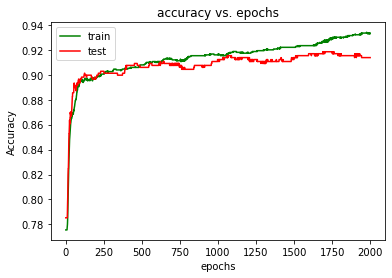

In [15]:
# plot learning curves
plt.figure()
plt.title('accuracy vs. epochs')
plt.plot(range(epochs), train_acc,'g',label='train')
plt.plot(range(epochs), test_acc,'r',label='test')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()